In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from cfae import Simple_CF_Ascent

%load_ext autoreload
%autoreload 2 


# Counterfactual-Ascent workspace

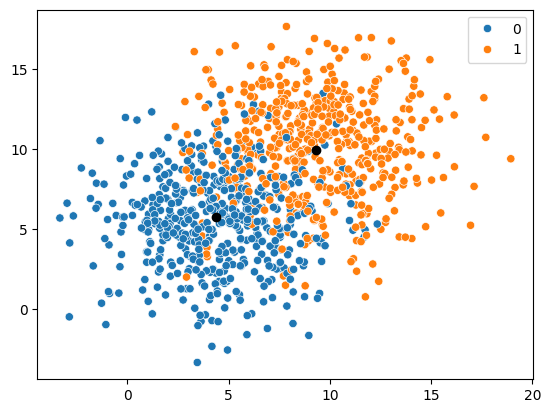

In [305]:
X, y, centers = make_blobs(centers=2, cluster_std=3, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [306]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,label
0,7.482253,12.616999,1.0
1,11.132704,11.190443,1.0
2,9.001397,11.257577,1.0
3,8.711734,6.107115,1.0
4,10.709449,13.507351,1.0
...,...,...,...
995,10.441632,10.036938,1.0
996,9.809060,10.890485,1.0
997,-0.091080,11.985068,0.0
998,14.468516,13.451235,1.0


In [307]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers)

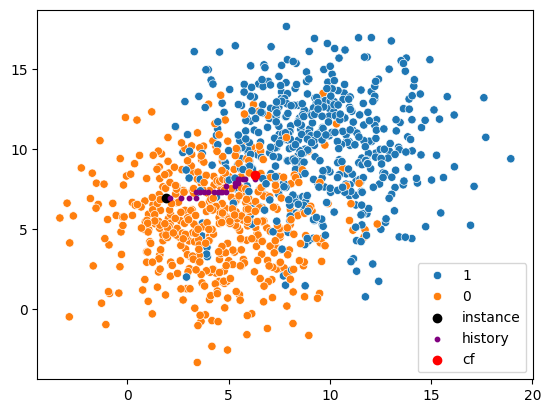

In [308]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=x[0],y=x[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf[0],y=cf[1],color='red', label='cf')
plt.legend()

## PCA attempt

<Axes: >

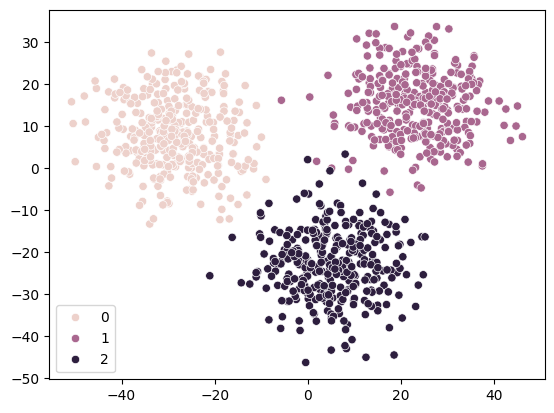

In [309]:
X, y, centers = make_blobs(centers=3, cluster_std=8, n_features=25, n_samples=1000, return_centers=True)

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

In [310]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,label
0,0.238379,12.601663,5.602974,-16.573239,18.897911,-1.188262,14.028562,9.629336,-7.266535,-2.645090,...,6.874558,-6.661987,-7.197874,-8.038252,2.714600,4.141832,6.803873,9.390518,-14.333541,2.0
1,8.798013,-3.082914,10.273953,-21.072291,15.439860,13.053428,4.986398,12.604705,-9.770521,29.560027,...,-0.752716,-7.532123,2.301854,15.212285,-12.692161,-3.943448,-8.174915,0.190813,15.270719,0.0
2,-7.613007,20.595414,7.676257,-6.950634,8.807823,-4.879976,4.741094,9.914448,6.464099,7.650801,...,-3.194279,-9.735374,0.035448,-12.262499,10.064043,7.830542,5.820589,10.428571,-0.115637,2.0
3,-4.808474,26.311465,-16.393967,-3.989124,4.492662,-9.337901,7.306226,4.406060,6.002745,-0.297656,...,1.376367,-8.452092,0.924993,-13.958423,-3.292579,0.581202,15.873959,22.030457,-12.507744,2.0
4,0.069848,15.621662,0.866723,-17.511775,6.272974,7.716437,-3.806487,-1.156621,-4.522583,3.143450,...,12.543988,-15.693462,12.236363,-14.638293,2.876786,8.110204,16.070504,-7.010283,-2.616688,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.849435,9.294656,9.145550,-14.058262,15.405931,-1.053794,25.159546,-7.872695,-13.855212,-6.319693,...,-9.444504,2.491453,21.444895,6.112492,-11.311444,-6.891736,-12.805576,-6.058547,-13.691146,0.0
996,-6.596516,2.457301,-2.142080,4.240444,2.988000,-2.071197,9.262696,0.489695,-17.270393,-3.660548,...,1.565801,-11.746112,0.090801,-0.090888,9.242368,6.762605,-5.269111,-1.265067,-6.318640,2.0
997,-12.237826,-8.280134,-1.593972,-5.264350,-9.267040,10.162972,15.470638,2.990057,-11.334665,4.613768,...,-2.432665,-6.995694,-8.603778,6.411720,-2.706449,14.526608,12.775322,3.998106,3.600039,1.0
998,-10.223038,11.852431,0.022263,-8.358135,-0.773928,0.153819,9.098739,13.998356,-3.959482,5.566113,...,-12.924058,-20.704079,0.768375,-1.790113,3.438798,2.373089,-1.804667,-6.283090,-26.566260,2.0


In [311]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers)

In [312]:
cf_pca = pca.transform([cf])[0]

h_pca = pca.transform(h)

hx = list(zip(*h_pca))[0]
hy = list(zip(*h_pca))[1]

x_pca = pca.transform([x])[0]

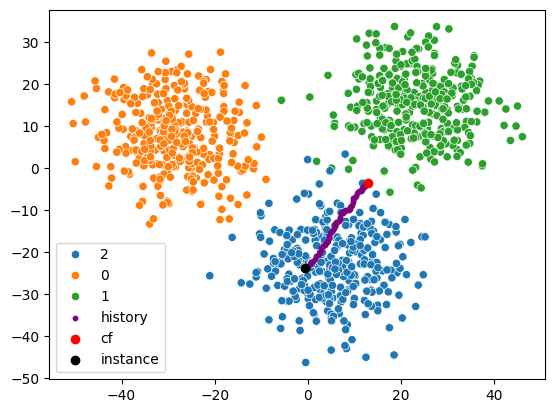

In [313]:

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf_pca[0],y=cf_pca[1],color='red', label='cf')
plt.scatter(x=x_pca[0],y=x_pca[1],color='black',label='instance')
plt.legend()